https://machinelearningmastery.com/lstm-autoencoders/

In [1]:
# LSTM Autoencoder recreate sequence
from numpy import array

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.utils import plot_model

In [2]:
# Define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [3]:
# Reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1,n_in, 1))

In [4]:
# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

In [5]:
model.compile(optimizer='adam', loss='mse')

In [6]:
# Fit model
model.fit(sequence, sequence, epochs=300, verbose=0)

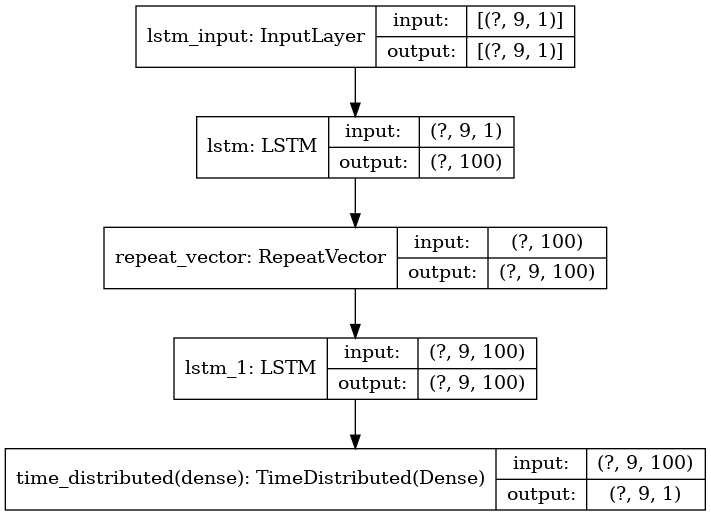

In [7]:
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')

In [8]:
# Demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

[0.10523899 0.19943443 0.29800585 0.39872345 0.4999558  0.60081345
 0.70093477 0.8003334  0.8992896 ]
